In [23]:
import time,multiprocessing,threading,random as r
import numpy as np
import pandas as pd

In [2]:
np.random.seed(50) # for reproducibilty

In [3]:
fixed = np.random.randint(1,10,size = (1000,1000))  # generates matrix with values between 0 and 10
print(fixed)

[[1 1 2 ... 2 5 8]
 [9 8 4 ... 1 3 1]
 [8 8 2 ... 6 1 7]
 ...
 [7 9 4 ... 6 3 8]
 [5 1 2 ... 6 1 1]
 [4 1 2 ... 9 4 5]]


Function to multiply fixed matrix with a random matrix

In [4]:
def multiply(fixed):
    temp = np.random.randint(1,10,size = (1000,1000))
    temp*fixed
    

define a function that takes no. of thread to make and no. of repetitions

In [10]:
def task(thread_num,reps):
    task_per_thread = reps//thread_num # // results in integer
    start = time.time()
    def multiply_rep(rep):
        for j in range(1,rep+1):
            multiply(fixed)
    threads = []
    for i in range(1,thread_num+1):
        t = threading.Thread(target = multiply_rep,args = (task_per_thread,))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    return round(time.time() - start,4)

Running The code for threads = 1 to 20.

In [26]:
num_cores = multiprocessing.cpu_count()
print(f"No. of Cores : {num_cores}")
threads = []
time_taken = []

for i in range(1,21):
    timetaken = task(i,100)
    threads.append(i)
    time_taken.append(timetaken)

No. of Cores : 16


In [27]:
results = pd.DataFrame({'threads':threads,
                        'timetaken': time_taken 
                        })
print(results)

    threads  timetaken
0         1     1.4182
1         2     1.2698
2         3     1.2649
3         4     1.2811
4         5     1.2874
5         6     1.2236
6         7     1.2646
7         8     1.2343
8         9     1.2684
9        10     1.2854
10       11     1.2743
11       12     1.2339
12       13     1.1690
13       14     1.2624
14       15     1.1531
15       16     1.2281
16       17     1.0830
17       18     1.1492
18       19     1.2110
19       20     1.2819


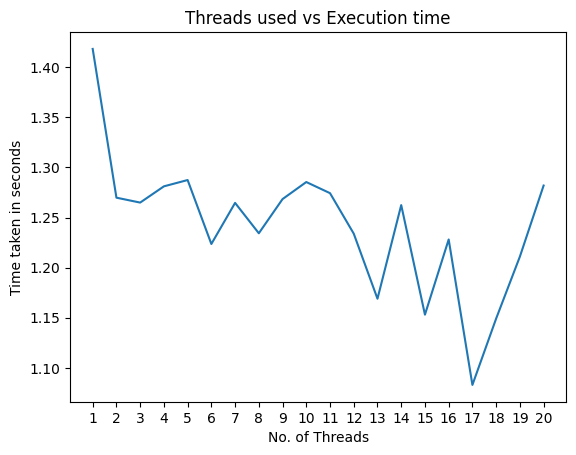

In [28]:
import matplotlib.pyplot as plt

plt.plot(threads,time_taken)

plt.xlabel('No. of Threads')
plt.ylabel('Time taken in seconds')
plt.title("Threads used vs Execution time")
plt.xticks(threads,threads)
plt.show()

It can be Concluded that the Multithreading Works Best when         
 No. of Threads  = no. of cores+1